<a href="https://colab.research.google.com/github/nimalan-parameswaran/Coronary-Heart-Disease-Prediction/blob/main/CHD_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

In [4]:
data = "/content/CVD_FinalData.csv"

In [5]:
data = pd.read_csv(data)

In [6]:
data.head(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,...,BMI,heartRate,glucose,exng,caa,Triglyceride,hdl_cholestrol,ldl_cholestrol,CPK_MB_Percentage,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,...,NaN,90.0,80.0,1,1,212,32,173,5,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,...,29.77,72.0,75.0,0,0,112,35,124,4,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,...,20.35,88.0,94.0,0,0,135,60,126,5,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,...,28.26,68.0,94.0,1,2,232,28,200,7,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,...,26.42,70.0,77.0,0,0,143,38,111,5,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,...,32.80,85.0,65.0,1,2,207,26,161,8,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,...,24.83,75.0,79.0,0,0,106,60,102,5,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,...,28.15,60.0,63.0,0,0,124,40,151,4,0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,...,20.70,86.0,79.0,0,0,115,35,106,3,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,...,25.71,85.0,NaN,0,0,166,40,121,5,0


In [7]:
data.columns.tolist()

['id',
 'age',
 'education',
 'sex',
 'is_smoking',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'exng',
 'caa',
 'Triglyceride',
 'hdl_cholestrol',
 'ldl_cholestrol',
 'CPK_MB_Percentage',
 'TenYearCHD']

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5390 entries, 0 to 5389
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5390 non-null   int64  
 1   age                5390 non-null   int64  
 2   education          5251 non-null   float64
 3   sex                5390 non-null   object 
 4   is_smoking         5390 non-null   object 
 5   cigsPerDay         5364 non-null   float64
 6   BPMeds             5318 non-null   float64
 7   prevalentStroke    5390 non-null   int64  
 8   prevalentHyp       5390 non-null   int64  
 9   diabetes           5390 non-null   int64  
 10  totChol            5324 non-null   float64
 11  sysBP              5390 non-null   float64
 12  diaBP              5390 non-null   float64
 13  BMI                5348 non-null   float64
 14  heartRate          5385 non-null   float64
 15  glucose            4933 non-null   float64
 16  exng               5390 

In [9]:
data.shape

(5390, 23)

In [10]:
data.nunique()

,0
id,3390
age,39
education,4
sex,2
is_smoking,2
cigsPerDay,32
BPMeds,2
prevalentStroke,2
prevalentHyp,2
diabetes,2


In [11]:
nulldata = data.isnull().sum()
nulldata

,0
id,0
age,0
education,139
sex,0
is_smoking,0
cigsPerDay,26
BPMeds,72
prevalentStroke,0
prevalentHyp,0
diabetes,0


In [12]:
data = data.dropna()
nullvalue = data.isnull().sum()
nullvalue

,0
id,0
age,0
education,0
sex,0
is_smoking,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0


In [13]:
print(data.shape)

(4662, 23)


In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4662.0,1688.094380,980.666169,1.00,825.25,1698.000,2529.000,3389.0
age,4662.0,51.288717,8.730603,32.00,44.00,51.000,59.000,70.0
education,4662.0,1.906478,1.015142,1.00,1.00,2.000,3.000,4.0
cigsPerDay,4662.0,9.715573,12.255932,0.00,0.00,1.000,20.000,70.0
BPMeds,4662.0,0.044616,0.206481,0.00,0.00,0.000,0.000,1.0
prevalentStroke,4662.0,0.009867,0.098852,0.00,0.00,0.000,0.000,1.0
prevalentHyp,4662.0,0.383526,0.486297,0.00,0.00,0.000,1.000,1.0
diabetes,4662.0,0.040970,0.198241,0.00,0.00,0.000,0.000,1.0
totChol,4662.0,241.307808,46.871568,113.00,210.00,238.000,268.000,600.0
sysBP,4662.0,136.911090,24.870708,83.50,120.00,132.000,150.000,295.0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4662 entries, 1 to 5389
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4662 non-null   int64  
 1   age                4662 non-null   int64  
 2   education          4662 non-null   float64
 3   sex                4662 non-null   object 
 4   is_smoking         4662 non-null   object 
 5   cigsPerDay         4662 non-null   float64
 6   BPMeds             4662 non-null   float64
 7   prevalentStroke    4662 non-null   int64  
 8   prevalentHyp       4662 non-null   int64  
 9   diabetes           4662 non-null   int64  
 10  totChol            4662 non-null   float64
 11  sysBP              4662 non-null   float64
 12  diaBP              4662 non-null   float64
 13  BMI                4662 non-null   float64
 14  heartRate          4662 non-null   float64
 15  glucose            4662 non-null   float64
 16  exng               4662 non-n

In [16]:
data["is_smoking"] = data["is_smoking"].map({"YES": 1, "NO": 0})

In [17]:
data["sex"] = data["sex"].map({"M": 1, "F": 0})

In [18]:
numerical_df = data
numerical_df.corr()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,...,BMI,heartRate,glucose,exng,caa,Triglyceride,hdl_cholestrol,ldl_cholestrol,CPK_MB_Percentage,TenYearCHD
id,1.000000,0.027195,-0.010227,0.003544,-0.006858,-0.004971,0.011309,-0.072276,0.039756,0.013337,...,0.053204,-0.003737,0.005113,-0.000252,0.001191,0.005744,-0.003385,0.008145,-0.014110,-0.000252
age,0.027195,1.000000,-0.159772,-0.023458,-0.216089,-0.186506,0.149474,0.063073,0.331889,0.120348,...,0.128471,0.021651,0.129143,0.322025,0.289024,0.277786,-0.248434,0.281869,0.256625,0.322025
education,-0.010227,-0.159772,1.000000,0.044929,0.030868,0.034868,-0.024102,-0.048528,-0.084218,-0.067311,...,-0.129689,-0.055943,-0.030994,-0.090307,-0.069003,-0.086976,0.056215,-0.068615,-0.069826,-0.090307
sex,0.003544,-0.023458,0.044929,1.000000,0.244096,0.355107,-0.056756,-0.013815,-0.025750,0.019275,...,0.031854,-0.107718,-0.006210,0.112962,0.114903,0.098204,-0.093421,0.084468,0.090474,0.112962
is_smoking,-0.006858,-0.216089,0.030868,0.244096,1.000000,0.778317,-0.060100,-0.053934,-0.146916,-0.065506,...,-0.147903,0.067221,-0.066422,0.046784,0.065531,0.027747,-0.045239,0.031140,0.046202,0.046784
cigsPerDay,-0.004971,-0.186506,0.034868,0.355107,0.778317,1.000000,-0.059841,-0.058778,-0.107037,-0.063197,...,-0.093586,0.081077,-0.063480,0.078681,0.109798,0.057622,-0.067838,0.052413,0.073013,0.078681
BPMeds,0.011309,0.149474,-0.024102,-0.056756,-0.060100,-0.059841,1.000000,0.073028,0.273978,0.123059,...,0.060919,0.055200,0.136856,0.109909,0.076028,0.085557,-0.105631,0.106842,0.077153,0.109909
prevalentStroke,-0.072276,0.063073,-0.048528,-0.013815,-0.053934,-0.058778,0.073028,1.000000,0.081932,0.034108,...,0.023236,0.011326,0.024072,0.058718,0.044352,0.046424,-0.039493,0.072565,0.047999,0.058718
prevalentHyp,0.039756,0.331889,-0.084218,-0.025750,-0.146916,-0.107037,0.273978,0.081932,1.000000,0.108485,...,0.288526,0.159785,0.132051,0.224837,0.181931,0.182020,-0.184883,0.191518,0.176704,0.224837
diabetes,0.013337,0.120348,-0.067311,0.019275,-0.065506,-0.063197,0.123059,0.034108,0.108485,1.000000,...,0.096998,0.060337,0.709335,0.112191,0.103980,0.099189,-0.085672,0.093102,0.084130,0.112191


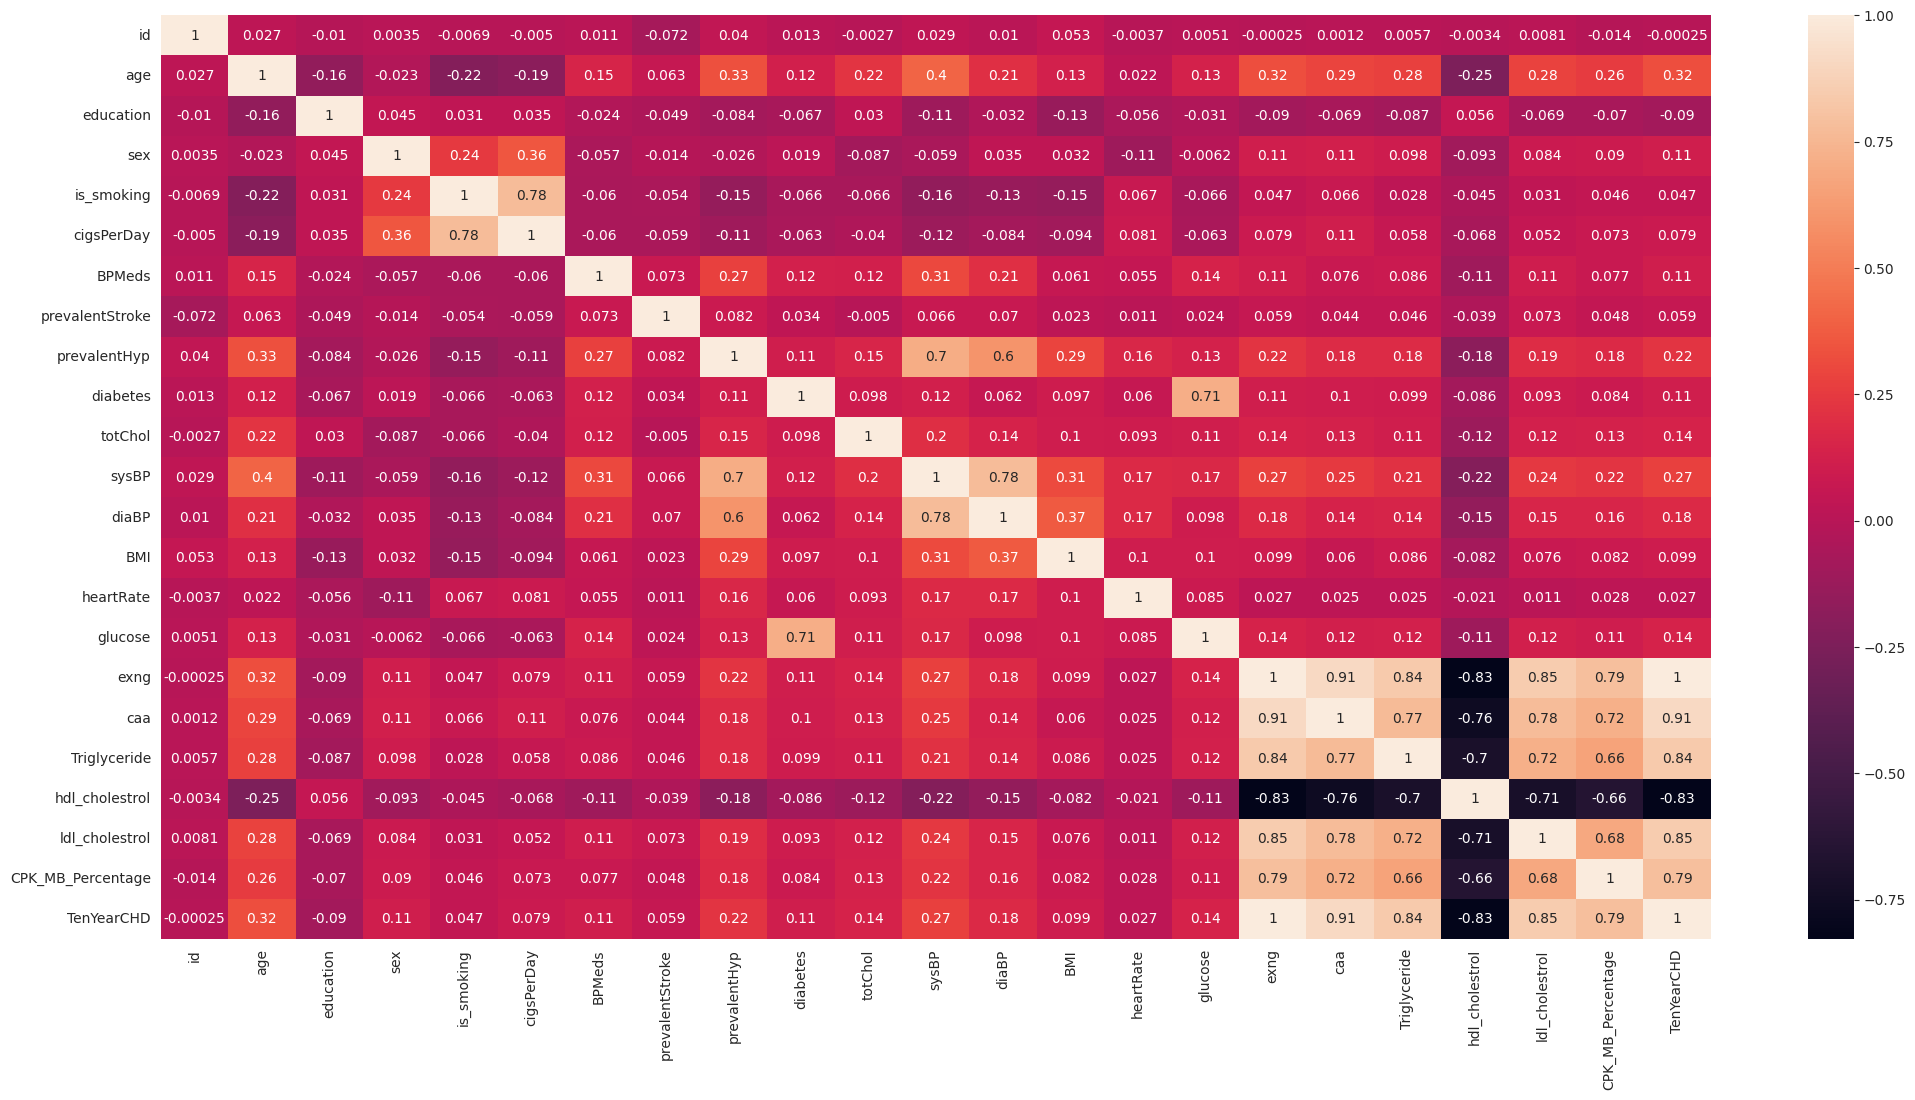

In [58]:
sns.heatmap(numerical_df.corr(),annot=True)
plt.rcParams['figure.figsize'] = (25,12)
plt.show()

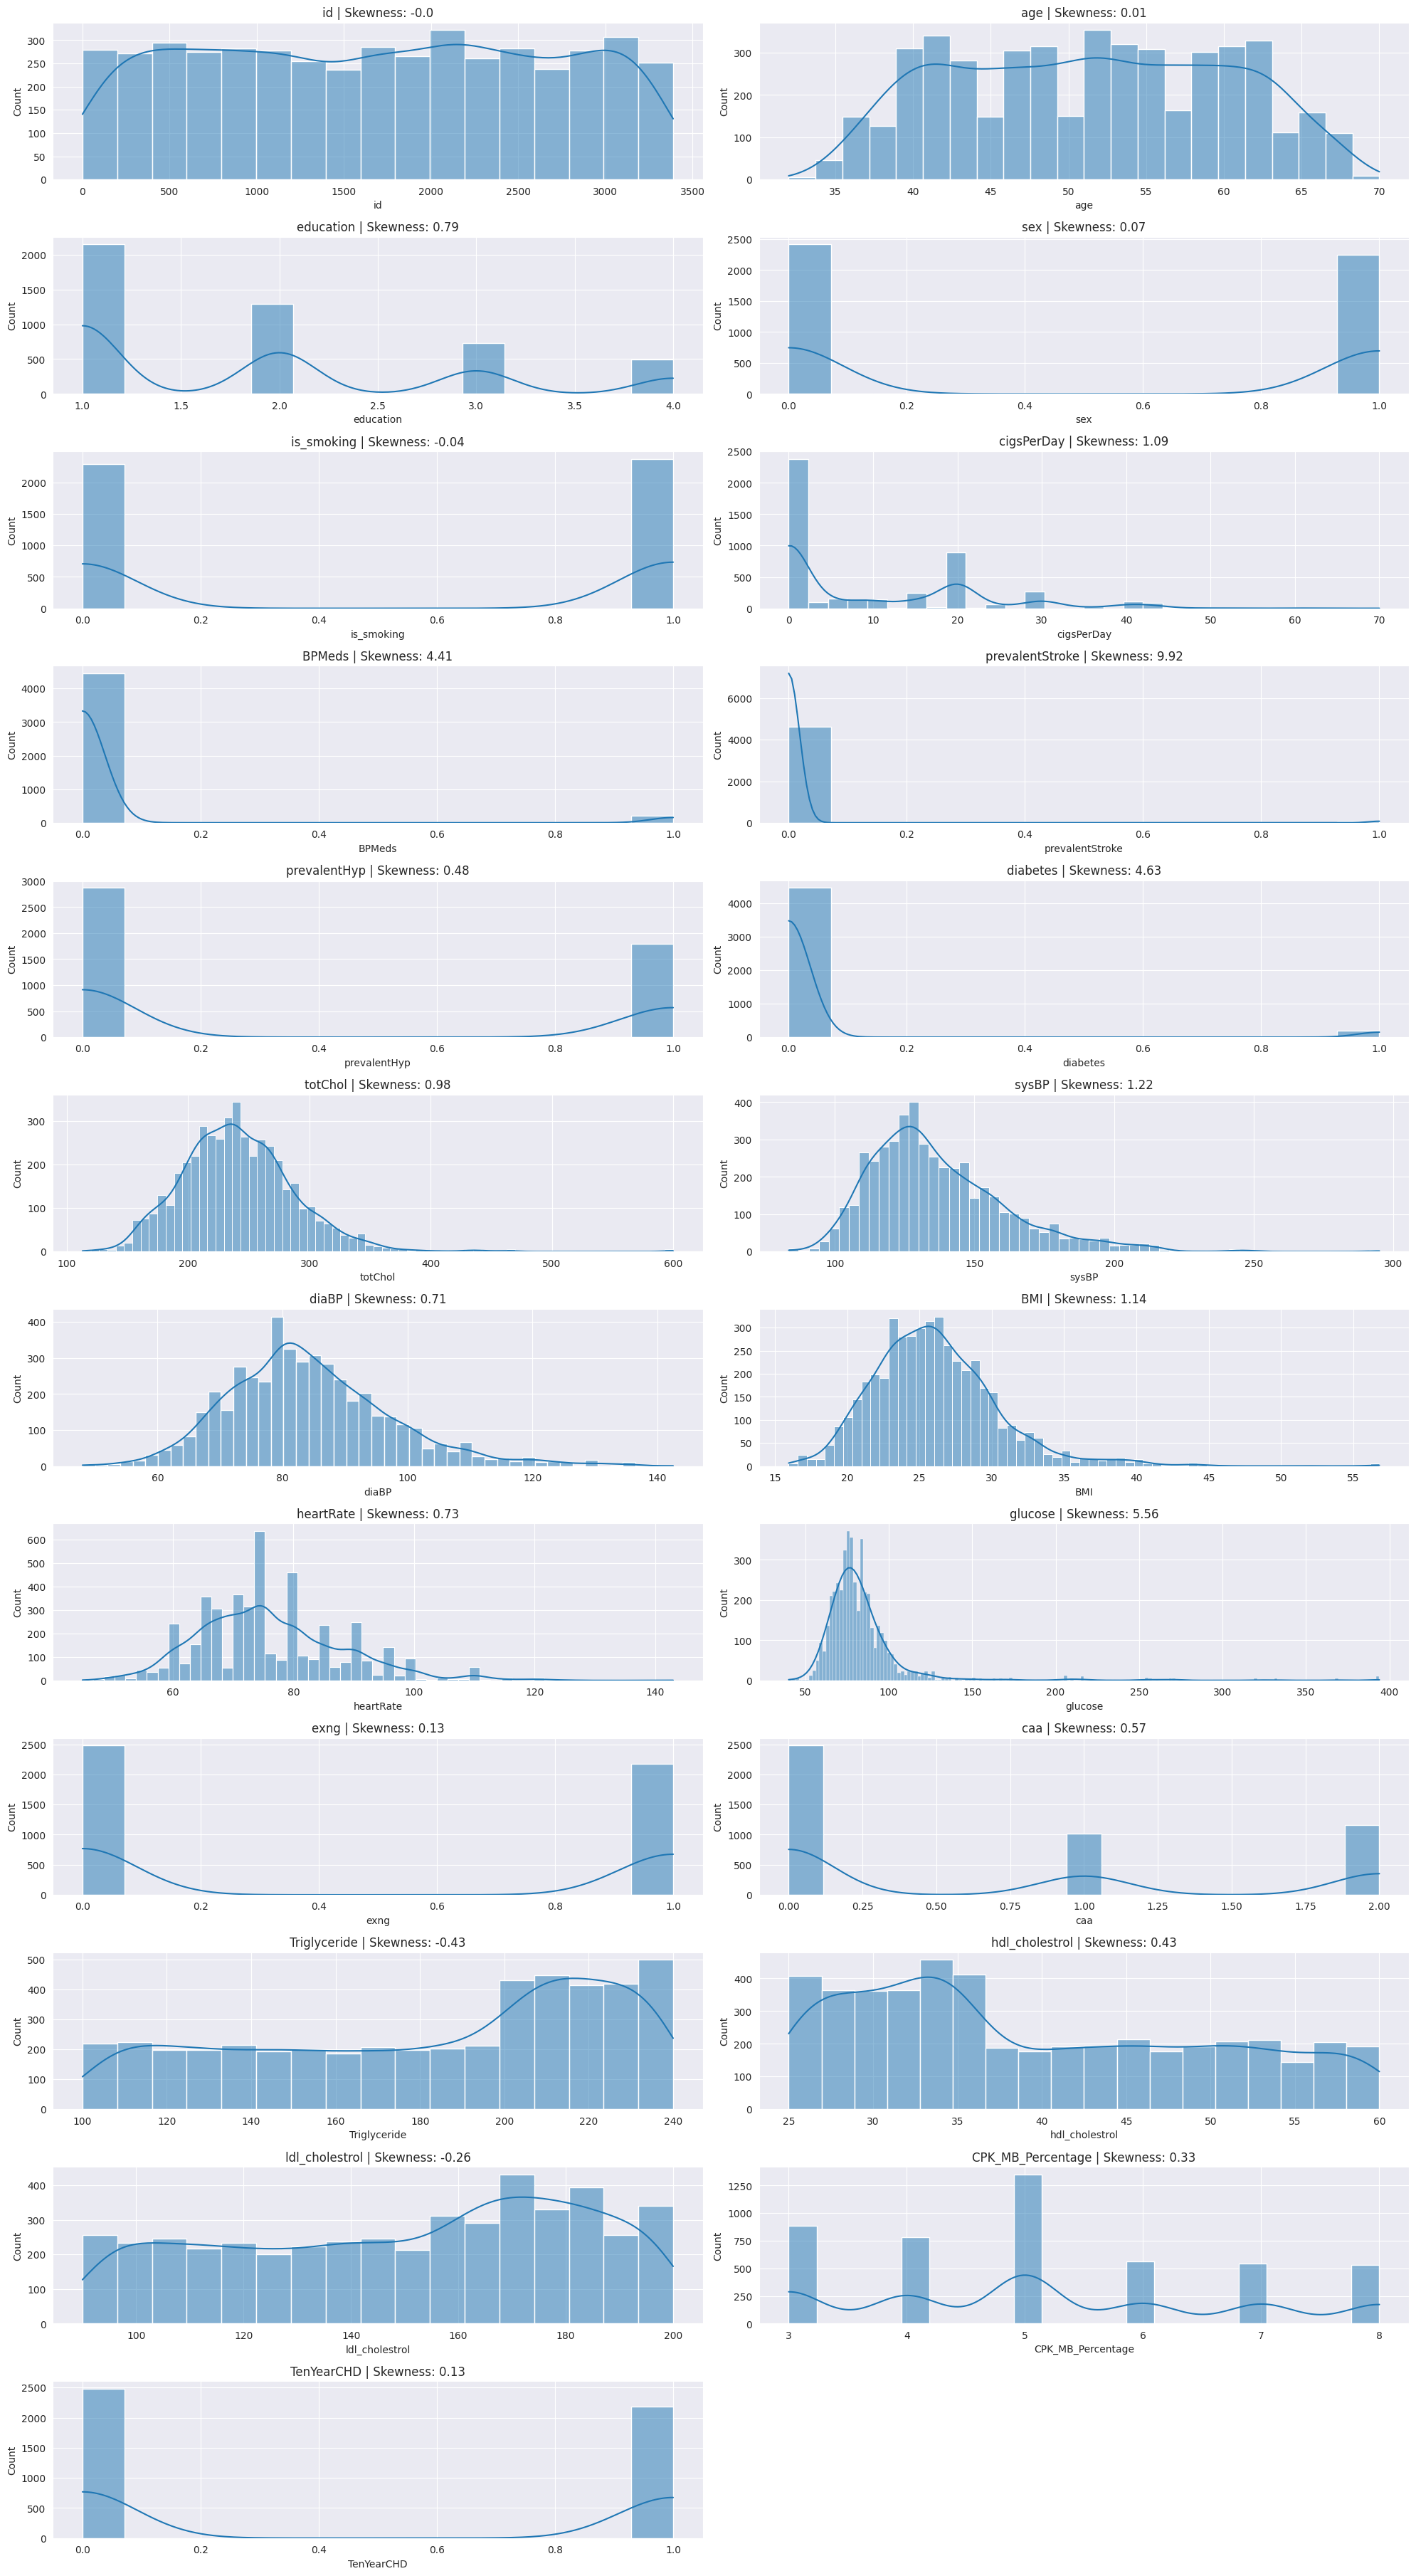

In [20]:
sns.set_style("darkgrid")

numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(20, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(data[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(data[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

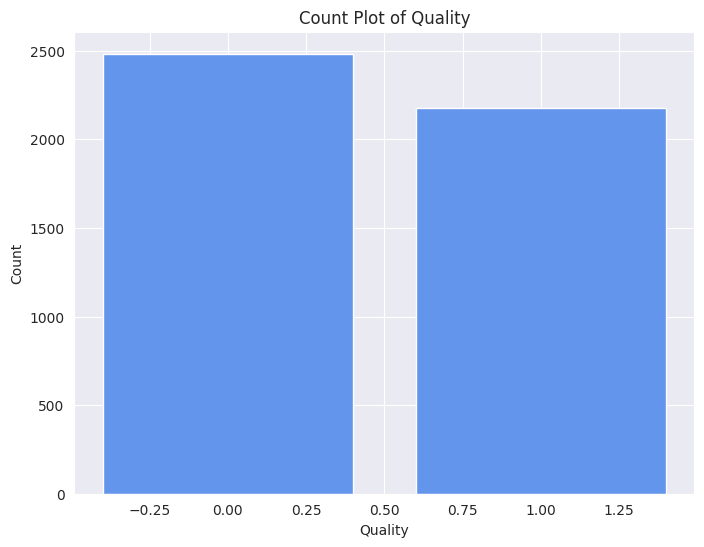

In [21]:
quality_counts = data['TenYearCHD'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(quality_counts.index, quality_counts, color='cornflowerblue')
plt.title('Count Plot of Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

In [22]:
data = data.drop(columns=["id","education", "heartRate", "CPK_MB_Percentage", "caa","exng","diaBP","diabetes","Triglyceride","ldl_cholestrol", "totChol" ])

In [23]:
data = data.rename(columns={"TenYearCHD": "CHD"})

In [24]:
data.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,sysBP,BMI,glucose,hdl_cholestrol,CHD
1,36,1,0,0.0,0.0,0,1,168.0,29.77,75.0,35,0
2,46,0,1,10.0,0.0,0,0,116.0,20.35,94.0,60,0
3,50,1,1,20.0,0.0,0,1,158.0,28.26,94.0,28,1
4,64,0,1,30.0,0.0,0,0,136.5,26.42,77.0,38,0
5,61,0,0,0.0,0.0,0,1,182.0,32.80,65.0,26,1


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4662 entries, 1 to 5389
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              4662 non-null   int64  
 1   sex              4662 non-null   int64  
 2   is_smoking       4662 non-null   int64  
 3   cigsPerDay       4662 non-null   float64
 4   BPMeds           4662 non-null   float64
 5   prevalentStroke  4662 non-null   int64  
 6   prevalentHyp     4662 non-null   int64  
 7   sysBP            4662 non-null   float64
 8   BMI              4662 non-null   float64
 9   glucose          4662 non-null   float64
 10  hdl_cholestrol   4662 non-null   int64  
 11  CHD              4662 non-null   int64  
dtypes: float64(5), int64(7)
memory usage: 473.5 KB


In [26]:
data

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,sysBP,BMI,glucose,hdl_cholestrol,CHD
1,36,1,0,0.0,0.0,0,1,168.0,29.77,75.0,35,0
2,46,0,1,10.0,0.0,0,0,116.0,20.35,94.0,60,0
3,50,1,1,20.0,0.0,0,1,158.0,28.26,94.0,28,1
4,64,0,1,30.0,0.0,0,0,136.5,26.42,77.0,38,0
5,61,0,0,0.0,0.0,0,1,182.0,32.80,65.0,26,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5385,50,0,0,0.0,0.0,0,1,143.0,29.36,86.0,33,1
5386,57,0,1,43.0,0.0,0,1,207.5,38.61,83.0,34,1
5387,58,1,1,20.0,0.0,0,1,146.0,27.47,73.0,34,1
5388,60,0,0,0.0,0.0,0,1,197.5,36.29,95.0,32,1


In [27]:
data.columns

Index(['age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'sysBP', 'BMI', 'glucose', 'hdl_cholestrol', 'CHD'],
      dtype='object')

In [28]:
features = ['age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
            'prevalentHyp', 'sysBP', 'BMI', 'glucose', 'hdl_cholestrol',]
target = 'CHD'

In [29]:
X = data[features]
y = data[target]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
log_reg = LogisticRegression(max_iter=1000, random_state=42, C=0.1) # Smaller C for stronger L2 regularization
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.9742765273311897
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       497
           1       0.96      0.99      0.97       436

    accuracy                           0.97       933
   macro avg       0.97      0.98      0.97       933
weighted avg       0.97      0.97      0.97       933



In [33]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)
y_pred_lda = lda.predict(X_test_scaled)
print("LDA Accuracy:", accuracy_score(y_test, y_pred_lda))
print(classification_report(y_test, y_pred_lda))

LDA Accuracy: 0.932475884244373
              precision    recall  f1-score   support

           0       1.00      0.88      0.93       497
           1       0.88      1.00      0.93       436

    accuracy                           0.93       933
   macro avg       0.94      0.94      0.93       933
weighted avg       0.94      0.93      0.93       933



In [34]:
ridge = RidgeClassifier(alpha=1.0) # Increase alpha for stronger L2 regularization
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
print("Ridge Classifier Accuracy:", accuracy_score(y_test, y_pred_ridge))
print(classification_report(y_test, y_pred_ridge))

Ridge Classifier Accuracy: 0.932475884244373
              precision    recall  f1-score   support

           0       1.00      0.88      0.93       497
           1       0.88      1.00      0.93       436

    accuracy                           0.93       933
   macro avg       0.94      0.94      0.93       933
weighted avg       0.94      0.93      0.93       933



In [35]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=5) # Added regularization
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9871382636655949
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       497
           1       0.98      0.99      0.99       436

    accuracy                           0.99       933
   macro avg       0.99      0.99      0.99       933
weighted avg       0.99      0.99      0.99       933



In [36]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=10, min_samples_leaf=5) # Added regularization
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9839228295819936
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       497
           1       0.97      1.00      0.98       436

    accuracy                           0.98       933
   macro avg       0.98      0.98      0.98       933
weighted avg       0.98      0.98      0.98       933



In [37]:
gb_model = GradientBoostingClassifier(n_estimators=200, random_state=42, max_depth=3, learning_rate=0.1) # Added regularization
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.9903536977491961
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       497
           1       0.98      1.00      0.99       436

    accuracy                           0.99       933
   macro avg       0.99      0.99      0.99       933
weighted avg       0.99      0.99      0.99       933



In [38]:
gb_model = GradientBoostingClassifier(n_estimators=200, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.9903536977491961
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       497
           1       0.98      1.00      0.99       436

    accuracy                           0.99       933
   macro avg       0.99      0.99      0.99       933
weighted avg       0.99      0.99      0.99       933



In [39]:
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42, max_depth=3, learning_rate=0.1, reg_alpha=0.1, reg_lambda=0.1) # Added regularization
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.984994640943194
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       497
           1       0.97      1.00      0.98       436

    accuracy                           0.98       933
   macro avg       0.98      0.99      0.98       933
weighted avg       0.99      0.98      0.99       933



In [40]:
lgb_model = LGBMClassifier(random_state=42, max_depth=10, learning_rate=0.1, reg_alpha=0.1, reg_lambda=0.1) # Added regularization
lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)

print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))

[LightGBM] [Info] Number of positive: 1743, number of negative: 1986
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 646
[LightGBM] [Info] Number of data points in the train set: 3729, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.467418 -> initscore=-0.130515
[LightGBM] [Info] Start training from score -0.130515
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [41]:
cat_model = CatBoostClassifier(verbose=0, random_state=42, max_depth=6, learning_rate=0.1, l2_leaf_reg=3) # Added regularization
cat_model.fit(X_train, y_train)

y_pred_cat = cat_model.predict(X_test)

print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))

CatBoost Accuracy: 0.9903536977491961
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       497
           1       0.98      1.00      0.99       436

    accuracy                           0.99       933
   macro avg       0.99      0.99      0.99       933
weighted avg       0.99      0.99      0.99       933



In [42]:
linear_svm = SVC(kernel='linear', random_state=42, C=0.1, probability=True) # Smaller C for stronger L2 regularization
linear_svm.fit(X_train_scaled, y_train)

y_pred_linear = linear_svm.predict(X_test_scaled)

print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

Linear SVM Accuracy: 0.977491961414791
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       497
           1       0.96      0.99      0.98       436

    accuracy                           0.98       933
   macro avg       0.98      0.98      0.98       933
weighted avg       0.98      0.98      0.98       933



In [43]:
rbf_svm = SVC(kernel='rbf', random_state=42, C=0.1, probability=True) # Smaller C for stronger L2 regularization
rbf_svm.fit(X_train_scaled, y_train)

y_pred_rbf = rbf_svm.predict(X_test_scaled)

print("Kernel SVM (RBF) Accuracy:", accuracy_score(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

Kernel SVM (RBF) Accuracy: 0.939978563772776
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       497
           1       0.90      0.99      0.94       436

    accuracy                           0.94       933
   macro avg       0.94      0.94      0.94       933
weighted avg       0.94      0.94      0.94       933



In [44]:
poly_svm = SVC(kernel='poly', degree=3, random_state=42, C=0.1, probability=True) # Smaller C for stronger L2 regularization
poly_svm.fit(X_train_scaled, y_train)

y_pred_poly = poly_svm.predict(X_test_scaled)

print("Kernel SVM (Polynomial) Accuracy:", accuracy_score(y_test, y_pred_poly))
print(classification_report(y_test, y_pred_poly))

Kernel SVM (Polynomial) Accuracy: 0.9539121114683816
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       497
           1       0.93      0.97      0.95       436

    accuracy                           0.95       933
   macro avg       0.95      0.96      0.95       933
weighted avg       0.95      0.95      0.95       933



In [45]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9410503751339764
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       497
           1       0.90      0.99      0.94       436

    accuracy                           0.94       933
   macro avg       0.94      0.94      0.94       933
weighted avg       0.95      0.94      0.94       933



In [46]:
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

y_pred_gnb = gnb.predict(X_test_scaled)

print("Gaussian Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_gnb))

Gaussian Naive Bayes Accuracy: 0.8981779206859593
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       497
           1       0.95      0.83      0.88       436

    accuracy                           0.90       933
   macro avg       0.91      0.89      0.90       933
weighted avg       0.90      0.90      0.90       933



In [47]:
bnb = BernoulliNB()
bnb.fit(X_train_scaled, y_train)

y_pred_bnb = bnb.predict(X_test_scaled)

print("Bernoulli Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_bnb))
print(classification_report(y_test, y_pred_bnb))

Bernoulli Naive Bayes Accuracy: 0.9067524115755627
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       497
           1       0.85      0.97      0.91       436

    accuracy                           0.91       933
   macro avg       0.91      0.91      0.91       933
weighted avg       0.92      0.91      0.91       933



In [48]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

y_pred_mnb = mnb.predict(X_test)

print("Multinomial Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_mnb))
print(classification_report(y_test, y_pred_mnb))

Multinomial Naive Bayes Accuracy: 0.9078242229367631
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       497
           1       0.88      0.93      0.90       436

    accuracy                           0.91       933
   macro avg       0.91      0.91      0.91       933
weighted avg       0.91      0.91      0.91       933



In [49]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Base models with regularization
log_reg = LogisticRegression(max_iter=1000, random_state=42, C=0.1)
rf = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=10, min_samples_leaf=5)
svm = SVC(kernel='linear', probability=True, random_state=42, C=0.1)

# Voting Classifier (soft voting uses predicted probabilities)
voting_clf = VotingClassifier(
    estimators=[('lr', log_reg), ('rf', rf), ('svm', svm)],
    voting='soft'
)

# Train
voting_clf.fit(X_train_scaled, y_train)

# Predict
y_pred_voting = voting_clf.predict(X_test_scaled)

# Evaluate
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))
print(classification_report(y_test, y_pred_voting))

Voting Classifier Accuracy: 0.9839228295819936
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       497
           1       0.98      0.99      0.98       436

    accuracy                           0.98       933
   macro avg       0.98      0.98      0.98       933
weighted avg       0.98      0.98      0.98       933



In [50]:
from sklearn.ensemble import StackingClassifier

# Base learners with regularization
base_learners = [
    ('lr', LogisticRegression(max_iter=1000, random_state=42, C=0.1)),
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42, max_depth=10, min_samples_leaf=5)),
    ('svm', SVC(kernel='linear', probability=True, random_state=42, C=0.1))
]

# Meta learner (final model)
meta_model = LogisticRegression(max_iter=1000, random_state=42)

# Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    passthrough=False
)

# Train
stacking_clf.fit(X_train_scaled, y_train)

# Predict
y_pred_stack = stacking_clf.predict(X_test_scaled)

# Evaluate
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred_stack))
print(classification_report(y_test, y_pred_stack))

Stacking Classifier Accuracy: 0.984994640943194
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       497
           1       0.98      0.99      0.98       436

    accuracy                           0.98       933
   macro avg       0.98      0.99      0.98       933
weighted avg       0.99      0.98      0.99       933



In [51]:
model_names = ['Logistic Regression', 'LDA', 'Ridge', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM', 'CatBoost', 'Linear SVM', 'Kernel SVM (RBF)', 'Kernel SVM (Poly)', 'KNN', 'Gaussian NB', 'Bernoulli NB', 'Multinomial NB', 'Voting Classifier', 'Stacking Classifier']
accuracy_scores = [
    accuracy_score(y_test, y_pred_log),
    accuracy_score(y_test, y_pred_lda),
    accuracy_score(y_test, y_pred_ridge),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_gb),
    accuracy_score(y_test, y_pred_xgb),
    accuracy_score(y_test, y_pred_lgb),
    accuracy_score(y_test, y_pred_cat),
    accuracy_score(y_test, y_pred_linear),
    accuracy_score(y_test, y_pred_rbf),
    accuracy_score(y_test, y_pred_poly),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_gnb),
    accuracy_score(y_test, y_pred_bnb),
    accuracy_score(y_test, y_pred_mnb),
    accuracy_score(y_test, y_pred_voting),
    accuracy_score(y_test, y_pred_stack)
]
# Create a dictionary of trained models
models = {
    'Logistic Regression': log_reg,
    'LDA': lda,
    'Ridge': ridge,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'XGBoost': xgb_model,
    'LightGBM': lgb_model,
    'CatBoost': cat_model,
    'Linear SVM': linear_svm,
    'Kernel SVM (RBF)': rbf_svm,
    'Kernel SVM (Poly)': poly_svm,
    'KNN': knn,
    'Gaussian NB': gnb,
    'Bernoulli NB': bnb,
    'Multinomial NB': mnb,
    'Voting Classifier': voting_clf,
    'Stacking Classifier': stacking_clf
}

In [59]:
from sklearn.model_selection import cross_val_score

cv_scores = {}
for name, model in models.items():
    try:
        # Determine which data to use based on the model (scaled or unscaled)
        data_to_use = X_train_scaled if name in ['Logistic Regression', 'LDA', 'Ridge', 'Linear SVM', 'Kernel SVM (RBF)', 'Kernel SVM (Poly)', 'KNN', 'Gaussian NB', 'Bernoulli NB', 'Voting Classifier', 'Stacking Classifier'] else X_train

        # Perform cross-validation
        scores = cross_val_score(model, data_to_use, y_train, cv=5) # Using 5 folds for cross-validation
        cv_scores[name] = scores.mean()
        print(f"{name} Cross-Validation Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")
    except Exception as e:
        print(f"Could not perform cross-validation for {name}: {e}")
        cv_scores[name] = 0

Logistic Regression Cross-Validation Accuracy: 0.9740 (+/- 0.0046)
LDA Cross-Validation Accuracy: 0.9340 (+/- 0.0122)
Ridge Cross-Validation Accuracy: 0.9340 (+/- 0.0122)
Decision Tree Cross-Validation Accuracy: 0.9861 (+/- 0.0023)
Random Forest Cross-Validation Accuracy: 0.9855 (+/- 0.0034)
Gradient Boosting Cross-Validation Accuracy: 0.9903 (+/- 0.0020)
XGBoost Cross-Validation Accuracy: 0.9874 (+/- 0.0038)
[LightGBM] [Info] Number of positive: 1394, number of negative: 1589
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000501 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 635
[LightGBM] [Info] Number of data points in the train set: 2983, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.467315 -> initscore=-0.130928
[LightGBM] [Info] Start training from score -0.130928
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

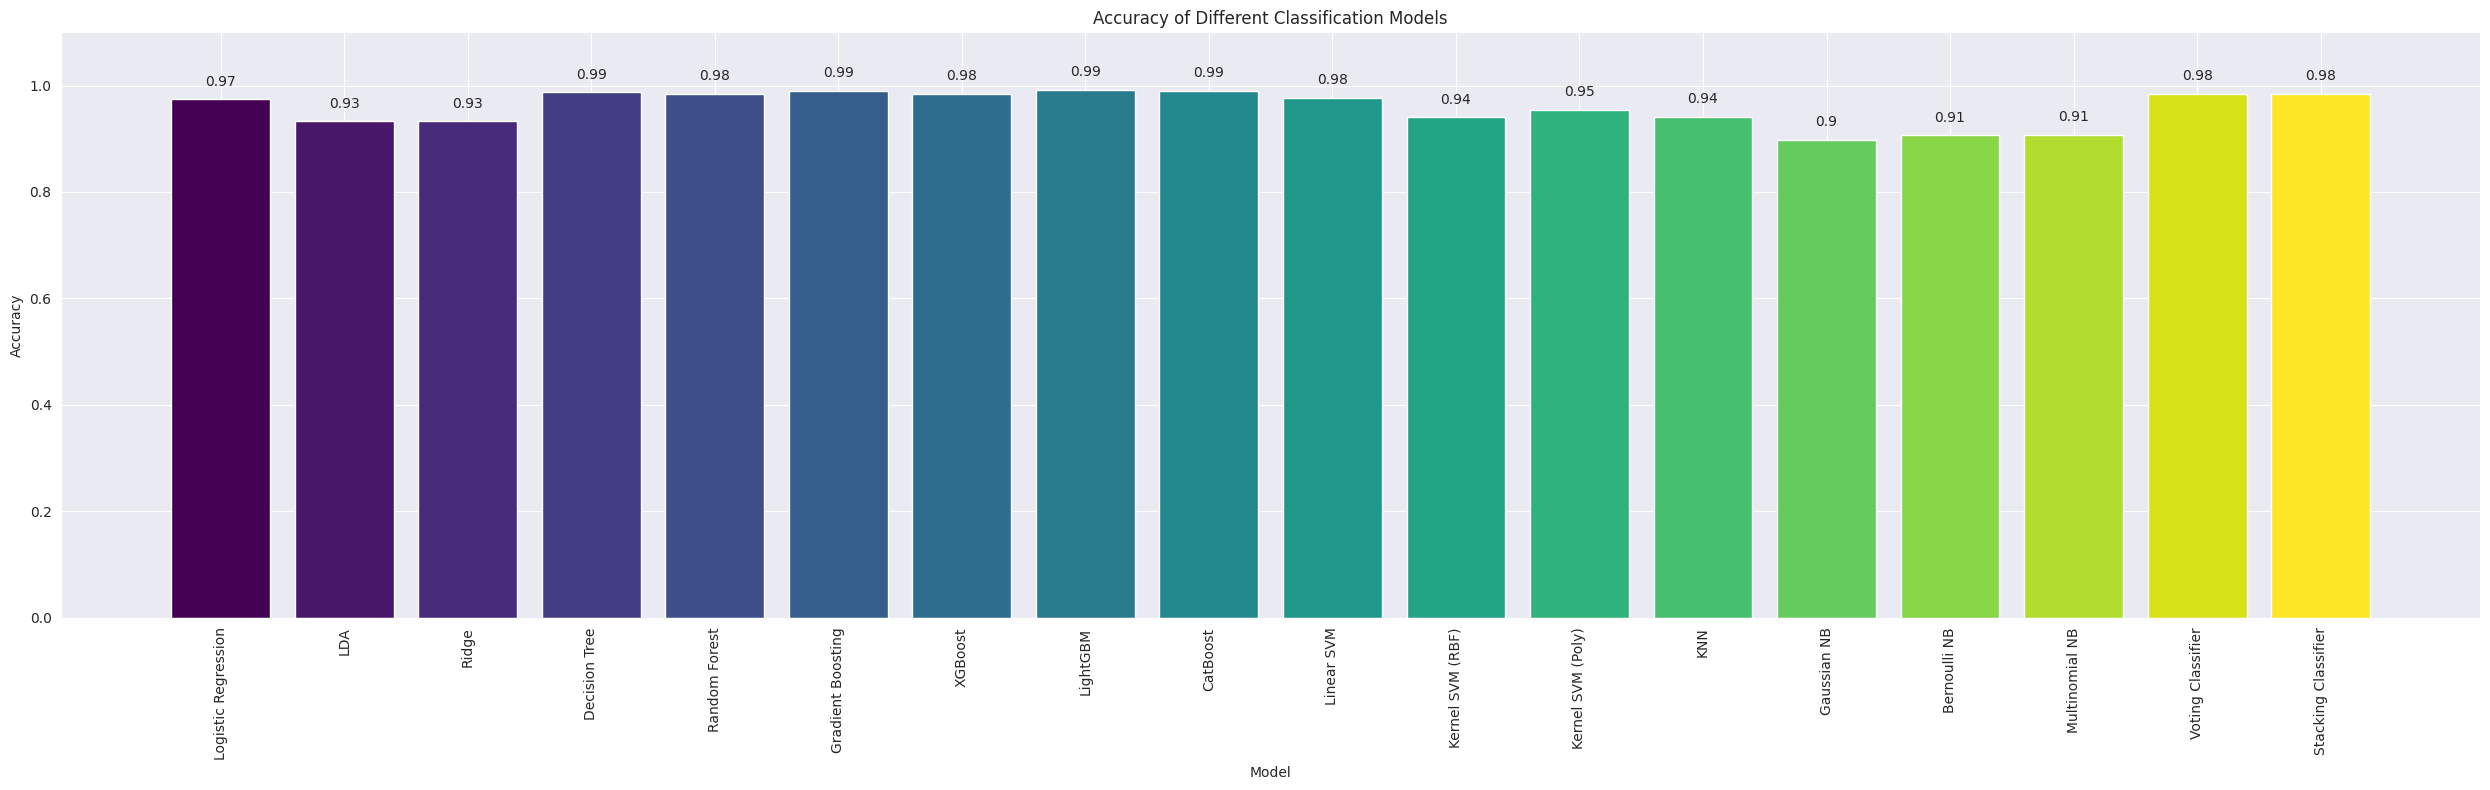

In [52]:
plt.figure(figsize=(25, 8))
bars = plt.bar(model_names, accuracy_scores, color=plt.cm.viridis(np.linspace(0, 1, len(model_names))))
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Classification Models")
plt.xticks(rotation=90)
plt.ylim(0, 1.1)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

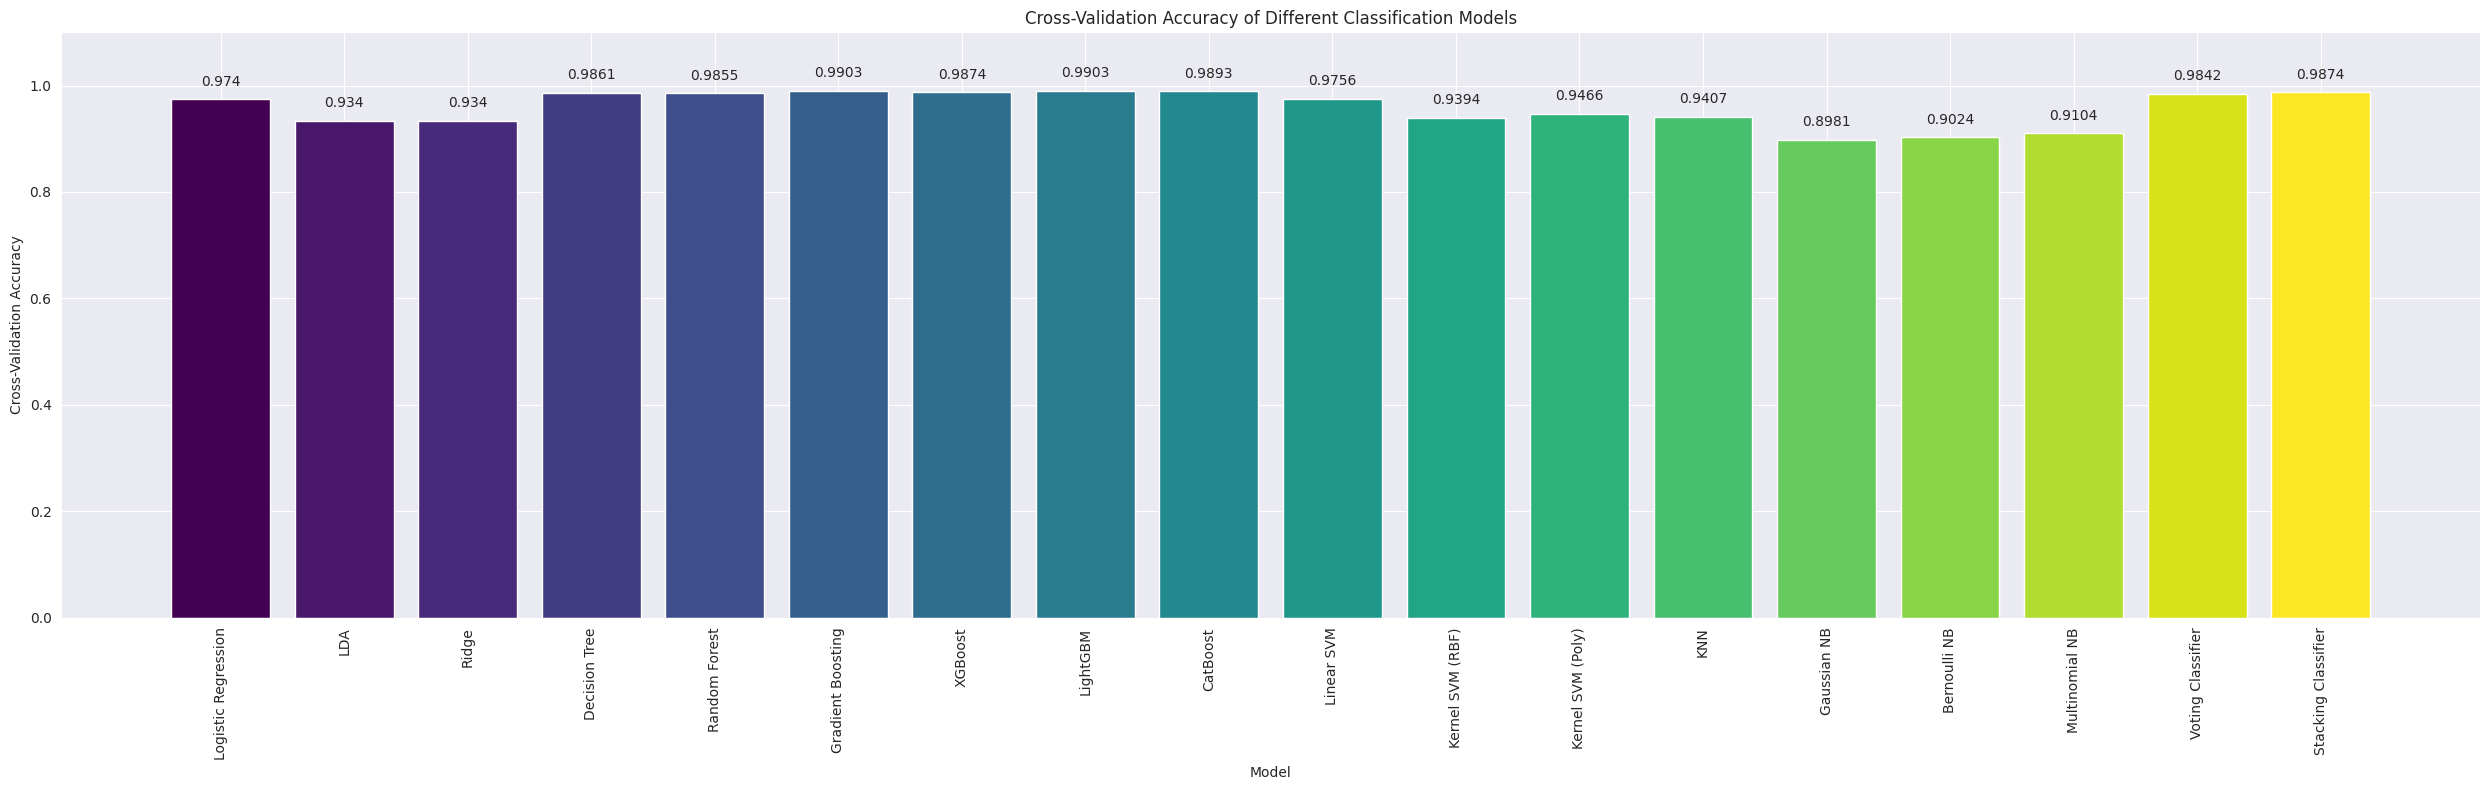

In [60]:
# Create a bar plot of cross-validation scores
plt.figure(figsize=(25, 8))
bars = plt.bar(cv_scores.keys(), cv_scores.values(), color=plt.cm.viridis(np.linspace(0, 1, len(cv_scores))))
plt.xlabel("Model")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Cross-Validation Accuracy of Different Classification Models")
plt.xticks(rotation=90)
plt.ylim(0, 1.1)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 4), ha='center', va='bottom')

plt.tight_layout()
plt.show()

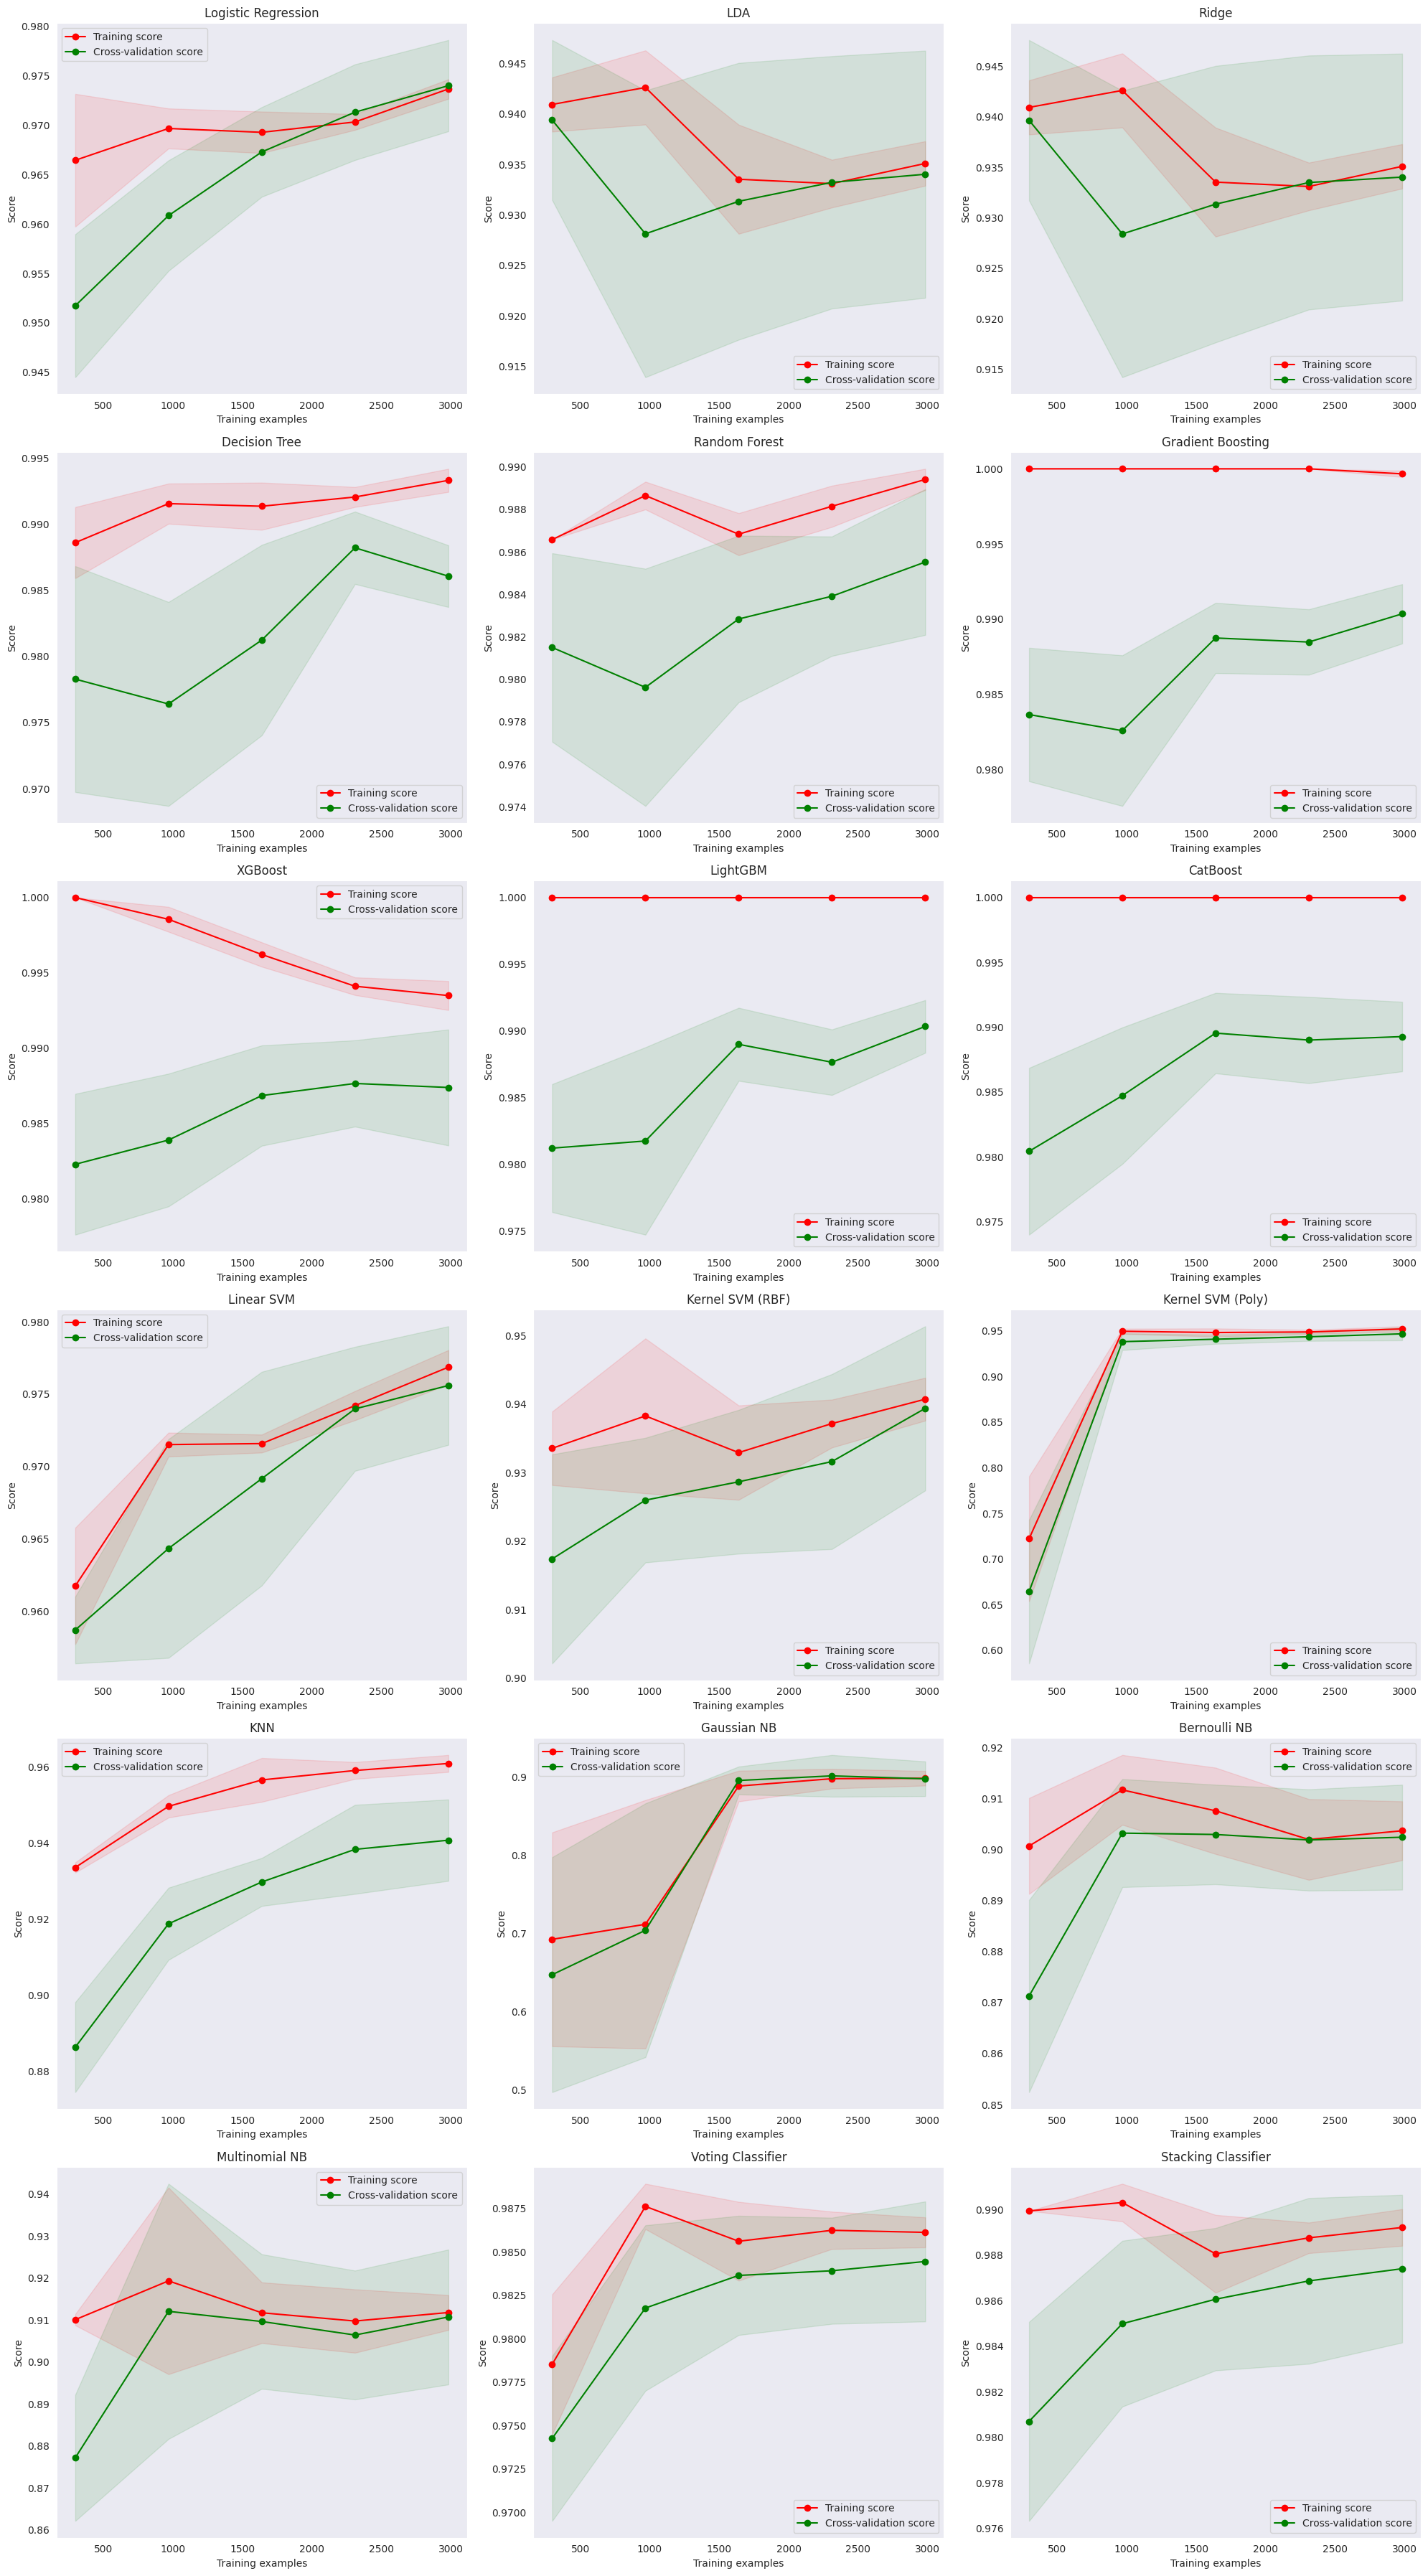

In [64]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ax, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    ax.grid()

    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    ax.legend(loc="best")
    return ax

# Generate learning curves for each model
n_models = len(models)
n_cols = 3
n_rows = (n_models + n_cols - 1) // n_cols

plt.figure(figsize=(20, n_rows * 6)) # Adjust overall figure size

for i, (name, model) in enumerate(models.items()):
    try:
        # Determine which data to use based on the model (scaled or unscaled)
        data_to_use_X = X_train_scaled if name in ['Logistic Regression', 'LDA', 'Ridge', 'Linear SVM', 'Kernel SVM (RBF)', 'Kernel SVM (Poly)', 'KNN', 'Gaussian NB', 'Bernoulli NB', 'Voting Classifier', 'Stacking Classifier'] else X_train
        data_to_use_y = y_train

        ax = plt.subplot(n_rows, n_cols, i + 1)
        plot_learning_curve(model, f"{name}", data_to_use_X, data_to_use_y, ax=ax, cv=5)

    except Exception as e:
        print(f"Could not generate learning curve for {name}: {e}")

plt.tight_layout()
plt.show()

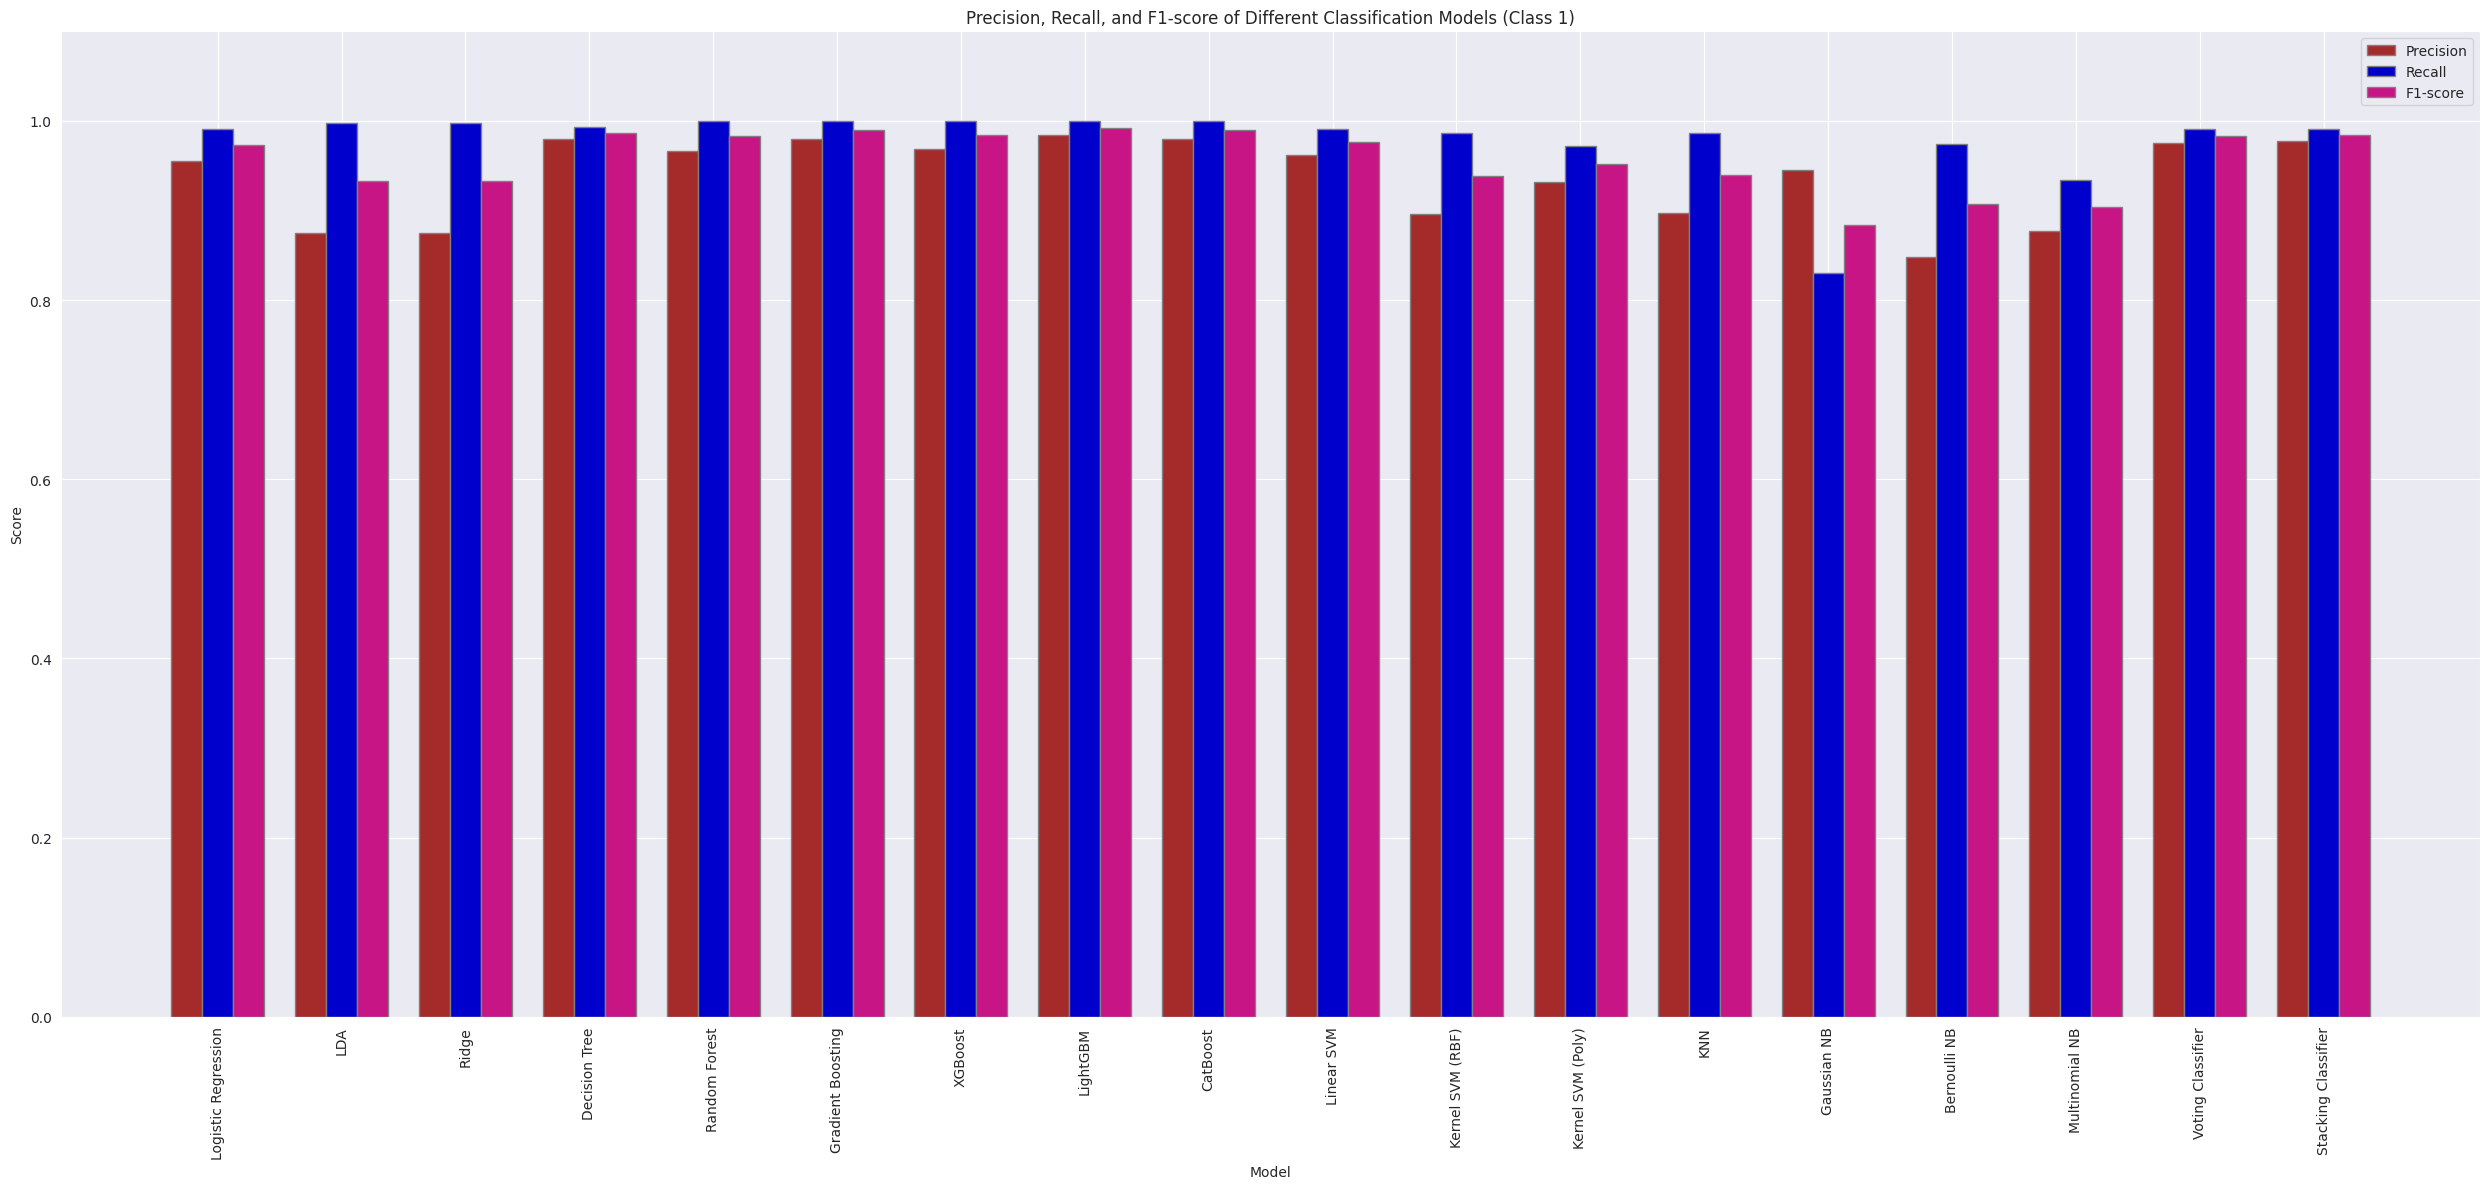

In [53]:
from sklearn.metrics import classification_report

# Create dictionaries to store precision, recall, and f1-score
precision_scores = {}
recall_scores = {}
f1_scores = {}

# Evaluate each model and store the scores
for name, model in models.items():
    try:
        # Determine which data to use based on the model
        data_to_predict = X_test_scaled if name in ['Logistic Regression', 'LDA', 'Ridge', 'Linear SVM', 'Kernel SVM (RBF)', 'Kernel SVM (Poly)', 'KNN', 'Gaussian NB', 'Bernoulli NB', 'Voting Classifier', 'Stacking Classifier'] else X_test

        # Refit the Logistic Regression model if it's the current model
        if name == 'Logistic Regression':
            model.fit(X_train_scaled, y_train)

        y_pred = model.predict(data_to_predict)
        report = classification_report(y_test, y_pred, output_dict=True)

        # Assuming the positive class is '1'
        precision_scores[name] = report['1']['precision']
        recall_scores[name] = report['1']['recall']
        f1_scores[name] = report['1']['f1-score']

    except Exception as e:
        print(f"Could not get metrics for {name}: {e}")
        precision_scores[name] = 0
        recall_scores[name] = 0
        f1_scores[name] = 0

# Create lists for plotting
model_names_list = list(precision_scores.keys())
precision_list = list(precision_scores.values())
recall_list = list(recall_scores.values())
f1_list = list(f1_scores.values())

bar_width = 0.25
r1 = np.arange(len(model_names_list))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(25, 12))
plt.bar(r1, precision_list, color='brown', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recall_list, color='mediumblue', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1_list, color='mediumvioletred', width=bar_width, edgecolor='grey', label='F1-score')

plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-score of Different Classification Models (Class 1)")
plt.xticks([r + bar_width for r in range(len(model_names_list))], model_names_list, rotation=90)
plt.ylim(0, 1.1)
plt.legend()
plt.tight_layout()
plt.show()

In [54]:
# Define custom data based on the features used for training (using the same custom_df from before)
custom_data = {'age': [36], 'sex': [1], 'is_smoking': [0], 'cigsPerDay': [0], 'BPMeds': [0.0],
               'prevalentStroke': [0], 'prevalentHyp': [1], 'sysBP': [168.0], 'BMI': [29.77],
               'glucose': [75.0], 'hdl_cholestrol': [35]}
custom_df = pd.DataFrame(custom_data)

# Scale the custom data using the fitted scaler (using the same custom_data_scaled from before)
custom_data_scaled = scaler.transform(custom_df)


print("Predictions and Confidence Levels for Custom Data:")
print("-" * 50)

for name, model in models.items():
    try:
        # Determine which data to use based on the model
        data_to_predict = custom_data_scaled if name in ['Logistic Regression', 'LDA', 'Ridge', 'Linear SVM', 'Kernel SVM (RBF)', 'Kernel SVM (Poly)', 'KNN', 'Gaussian NB', 'Bernoulli NB', 'Voting Classifier', 'Stacking Classifier'] else custom_df

        prediction = model.predict(data_to_predict)

        prediction_text = "The model predicts a higher risk of TenYearCHD for this individual." if prediction[0] == 1 else "The model predicts a lower risk of TenYearCHD for this individual."

        if hasattr(model, 'predict_proba'):
            confidence = model.predict_proba(data_to_predict)[0]
            # Assuming the positive class (1) is at index 1 in the confidence array
            print(f"{name}: Prediction = \"{prediction_text}\", Confidence = [{confidence[1]:.8f}]\n")
        else:
            print(f"{name}: Prediction = \"{prediction_text}\"\n")

    except Exception as e:
        print(f"Could not make prediction with {name}: {e}")

print("-" * 50)

Predictions and Confidence Levels for Custom Data:
--------------------------------------------------
Logistic Regression: Prediction = "The model predicts a lower risk of TenYearCHD for this individual.", Confidence = [0.46167373]

LDA: Prediction = "The model predicts a higher risk of TenYearCHD for this individual.", Confidence = [0.71891049]

Ridge: Prediction = "The model predicts a higher risk of TenYearCHD for this individual."

Decision Tree: Prediction = "The model predicts a lower risk of TenYearCHD for this individual.", Confidence = [0.00000000]

Random Forest: Prediction = "The model predicts a higher risk of TenYearCHD for this individual.", Confidence = [0.50800572]

Gradient Boosting: Prediction = "The model predicts a lower risk of TenYearCHD for this individual.", Confidence = [0.03507559]

XGBoost: Prediction = "The model predicts a lower risk of TenYearCHD for this individual.", Confidence = [0.08208685]

LightGBM: Prediction = "The model predicts a lower risk of Te

In [55]:
import joblib
import os

# Create a directory to save the models if it doesn't exist
model_save_dir = 'saved_models'
os.makedirs(model_save_dir, exist_ok=True)

# Save each trained model
for name, model in models.items():
    filename = os.path.join(model_save_dir, f'{name.replace(" ", "_")}.joblib')
    try:
        joblib.dump(model, filename)
        print(f"Saved {name} to {filename}")
    except Exception as e:
        print(f"Could not save {name}: {e}")
print("\nzip......\n")
!zip saed_models.zip saved_models/*

Saved Logistic Regression to saved_models/Logistic_Regression.joblib
Saved LDA to saved_models/LDA.joblib
Saved Ridge to saved_models/Ridge.joblib
Saved Decision Tree to saved_models/Decision_Tree.joblib
Saved Random Forest to saved_models/Random_Forest.joblib
Saved Gradient Boosting to saved_models/Gradient_Boosting.joblib
Saved XGBoost to saved_models/XGBoost.joblib
Saved LightGBM to saved_models/LightGBM.joblib
Saved CatBoost to saved_models/CatBoost.joblib
Saved Linear SVM to saved_models/Linear_SVM.joblib
Saved Kernel SVM (RBF) to saved_models/Kernel_SVM_(RBF).joblib
Saved Kernel SVM (Poly) to saved_models/Kernel_SVM_(Poly).joblib
Saved KNN to saved_models/KNN.joblib
Saved Gaussian NB to saved_models/Gaussian_NB.joblib
Saved Bernoulli NB to saved_models/Bernoulli_NB.joblib
Saved Multinomial NB to saved_models/Multinomial_NB.joblib
Saved Voting Classifier to saved_models/Voting_Classifier.joblib
Saved Stacking Classifier to saved_models/Stacking_Classifier.joblib

zip......

  addi

In [56]:
from google.colab import files

# Save the scaler
joblib.dump(scaler, os.path.join(model_save_dir, 'scaler.joblib'))
print("Scaler saved.")

# Download the scaler
files.download(os.path.join(model_save_dir, 'scaler.joblib'))

Scaler saved.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
from google.colab import files

# Save the scaler
joblib.dump(scaler, os.path.join(model_save_dir, 'scaler.joblib'))
print("Scaler saved.")

# Download the Logistic Regression model
files.download(os.path.join(model_save_dir, 'Logistic_Regression.joblib'))

Scaler saved.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>